In [63]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [64]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from paper_visualizations import * 
from PixelEM import * 
# from test_sample import test_sample_obj
from withClustAnalysis import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/jlee782/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'box', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ran testBinaryThresholdSearch.py 25workers_rand0 from obj 1~44 using compareWith as MV v.s. gt 

In [65]:
# !cat testBinaryThresholdSearch.py

In [66]:
import glob

In [67]:
df_data = []
comparedWith = "MV"
for path in glob.glob("pixel_em/*/obj*/*_ground_truth_cwMV_EM_prj_best_thresh*"):
    objid = int(path.split("obj")[-1].split("/")[0])
    algo = path.split("/")[-1].split("_")[0]
    p,r,j = json.load(open(path))
    sample_name= path.split("/")[1]
    df_data.append([sample_name,objid,algo,p,r,j,comparedWith])

comparedWith = "gt"
for path in glob.glob("pixel_em/*/obj*/*_ground_truth_cwgt_EM_prj_best_thresh*"):
    objid = int(path.split("obj")[-1].split("/")[0])
    algo = path.split("/")[-1].split("_")[0]
    p,r,j = json.load(open(path))
    sample_name= path.split("/")[1]
    df_data.append([sample_name,objid,algo,p,r,j,comparedWith])

In [68]:
df = pd.DataFrame(df_data,columns=["sample_name","objid","algo","p","r","j","comparedWith"])

In [27]:
df.loc[df.comparedWith=="gt", 'j'].values[0]

0.85546875

In [38]:
def calculate_diff(group):
    group['diff'] = group.loc[group.comparedWith=="gt", 'j'].values[0] - group.loc[group.comparedWith=="MV", 'j'].values[0]
    return group
new_df = df.groupby(["sample_name","objid","algo"]).apply(calculate_diff)

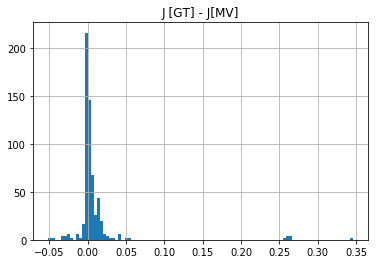

In [48]:
axes =  new_df["diff"].hist(bins=100)
plt.title("J [GT] - J[MV]")

In [62]:
new_df[new_df["diff"]>0.25]

,sample_name,objid,algo,p,r,j,comparedWith,diff
115,10workers_rand0,20,basic,0.997144,0.684936,0.683594,MV,0.256918
116,10workers_rand0,20,GT,0.997144,0.684936,0.683594,MV,0.258529
117,10workers_rand0,20,GTLSA,0.997144,0.684936,0.683594,MV,0.263060
118,10workers_rand0,20,isoGT,0.997144,0.684936,0.683594,MV,0.258529
119,10workers_rand0,20,isoGTLSA,0.997628,0.681651,0.680548,MV,0.262966
209,25workers_rand1,10,isoGTLSA,0.654218,1.000000,0.654218,MV,0.345782
415,10workers_rand0,20,basic,0.965001,0.973727,0.940512,gt,0.256918
416,10workers_rand0,20,GT,0.964980,0.975476,0.942124,gt,0.258529
417,10workers_rand0,20,GTLSA,0.971851,0.973343,0.946654,gt,0.263060
418,10workers_rand0,20,isoGT,0.964980,0.975476,0.942124,gt,0.258529


In [43]:
new_df["diff"].mean()

0.0086534717880592249

In [57]:
new_df[new_df["diff"]<0].count()["diff"]/600.

0.28666666666666668

In [59]:
new_df[new_df["diff"]>0].count()["diff"]/600.

0.64333333333333331

In [61]:
new_df[new_df["diff"]==0].count()["diff"]/600.

0.070000000000000007